In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('/scratch/06028/tbweng/child-motion/post_scan_interview_data.xlsx' )
df.head()

,MRI ID,Point to the face that shows how you felt during the scan?,Point to the face that shows how you felt wearing the helmet?,"Which did you like better, the scans with the helmet or without?",Unnamed: 4,What was the best part of the scan?,What was the worst part of the scan?,Would you do another scan with the helmet?
0,3.0,4.0,5.0,With,NaN,Movie,Ear plugs were pushing in too far without the ...,Yes
1,4.0,4.0,3.0,Without,NaN,Movie,Noise,Maybe
2,5.0,4.0,4.0,With,NaN,"Movie, bed moving up and down",MRI was loud during quiet parts of movie,Yes
3,6.0,3.0,4.0,Without,NaN,Movie,Monster on the TV,No
4,7.0,4.0,3.0,With,NaN,Movie,Nothing,Yes


In [3]:
df['MRI ID'] = df['MRI ID'].astype('float')

In [4]:
df = df[df['MRI ID'].notna()]
df

,MRI ID,Point to the face that shows how you felt during the scan?,Point to the face that shows how you felt wearing the helmet?,"Which did you like better, the scans with the helmet or without?",Unnamed: 4,What was the best part of the scan?,What was the worst part of the scan?,Would you do another scan with the helmet?
0,3.0,4.0,5.0,With,NaN,Movie,Ear plugs were pushing in too far without the ...,Yes
1,4.0,4.0,3.0,Without,NaN,Movie,Noise,Maybe
2,5.0,4.0,4.0,With,NaN,"Movie, bed moving up and down",MRI was loud during quiet parts of movie,Yes
3,6.0,3.0,4.0,Without,NaN,Movie,Monster on the TV,No
4,7.0,4.0,3.0,With,NaN,Movie,Nothing,Yes
5,8.0,3.0,4.0,Without,NaN,Movie,Nothing,Yes
6,9.0,3.0,3.0,Without,NaN,Getting out of it,The noise,No
7,10.0,5.0,4.0,Without,NaN,Movie,Nothing,Yes
8,11.0,4.0,3.0,Without,NaN,Movie,Nothing,Yes
9,12.0,4.0,2.5,Without,NaN,"Movie, laying down",Uncomfortable with the mask,Only if modifications were made to the helmet


In [5]:
df['MRI ID'] = df['MRI ID'].astype('int').astype('str').apply(lambda x: x.zfill(3))
df.head()

,MRI ID,Point to the face that shows how you felt during the scan?,Point to the face that shows how you felt wearing the helmet?,"Which did you like better, the scans with the helmet or without?",Unnamed: 4,What was the best part of the scan?,What was the worst part of the scan?,Would you do another scan with the helmet?
0,003,4.0,5.0,With,NaN,Movie,Ear plugs were pushing in too far without the ...,Yes
1,004,4.0,3.0,Without,NaN,Movie,Noise,Maybe
2,005,4.0,4.0,With,NaN,"Movie, bed moving up and down",MRI was loud during quiet parts of movie,Yes
3,006,3.0,4.0,Without,NaN,Movie,Monster on the TV,No
4,007,4.0,3.0,With,NaN,Movie,Nothing,Yes


In [6]:
df = df.drop(df.columns[4], axis=1)

df.rename(columns={df.columns[0]: 'sub',
                   df.columns[1]: 'mold-',
                   df.columns[2]: 'mold+',
                   df.columns[3]: 'compare',
                   df.columns[6]: 'return' 
                   }, inplace = True)



In [7]:
df.replace({"compare": {"With": 1, 'Without': 0, 'Both': 2, 'Can\'t really say': 2},
            "return": {'No': 0, 'Yes': 1, 'Maybe': 2}  }, inplace = True)

df.loc[df['sub'] == '012', 'return'] = 2
df.loc[df['sub'] == '016', 'return'] = 1
df.loc[df['sub'] == '017', 'return'] = 1

df

,sub,mold-,mold+,compare,What was the best part of the scan?,What was the worst part of the scan?,return
0,003,4.0,5.0,1,Movie,Ear plugs were pushing in too far without the ...,1
1,004,4.0,3.0,0,Movie,Noise,2
2,005,4.0,4.0,1,"Movie, bed moving up and down",MRI was loud during quiet parts of movie,1
3,006,3.0,4.0,0,Movie,Monster on the TV,0
4,007,4.0,3.0,1,Movie,Nothing,1
5,008,3.0,4.0,0,Movie,Nothing,1
6,009,3.0,3.0,0,Getting out of it,The noise,0
7,010,5.0,4.0,0,Movie,Nothing,1
8,011,4.0,3.0,0,Movie,Nothing,1
9,012,4.0,2.5,0,"Movie, laying down",Uncomfortable with the mask,2


In [8]:
#drop 006
df = df[~df['sub'].str.contains("006")]

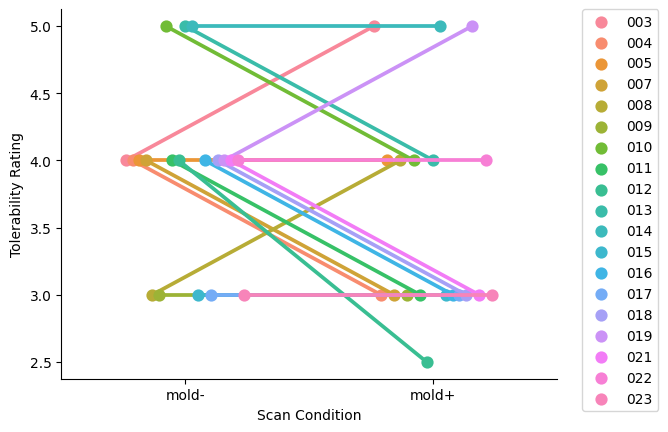

In [20]:
plt.rcdefaults()
ax = sns.pointplot(x="variable", y="value", data=df[['sub', 'mold-', 'mold+']].melt(id_vars = 'sub'), order = ['mold-', 'mold+'], hue = 'sub', dodge = True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Scan Condition', ylabel='Tolerability Rating')
sns.despine()
sns.set_context("paper")

No handles with labels found to put in legend.


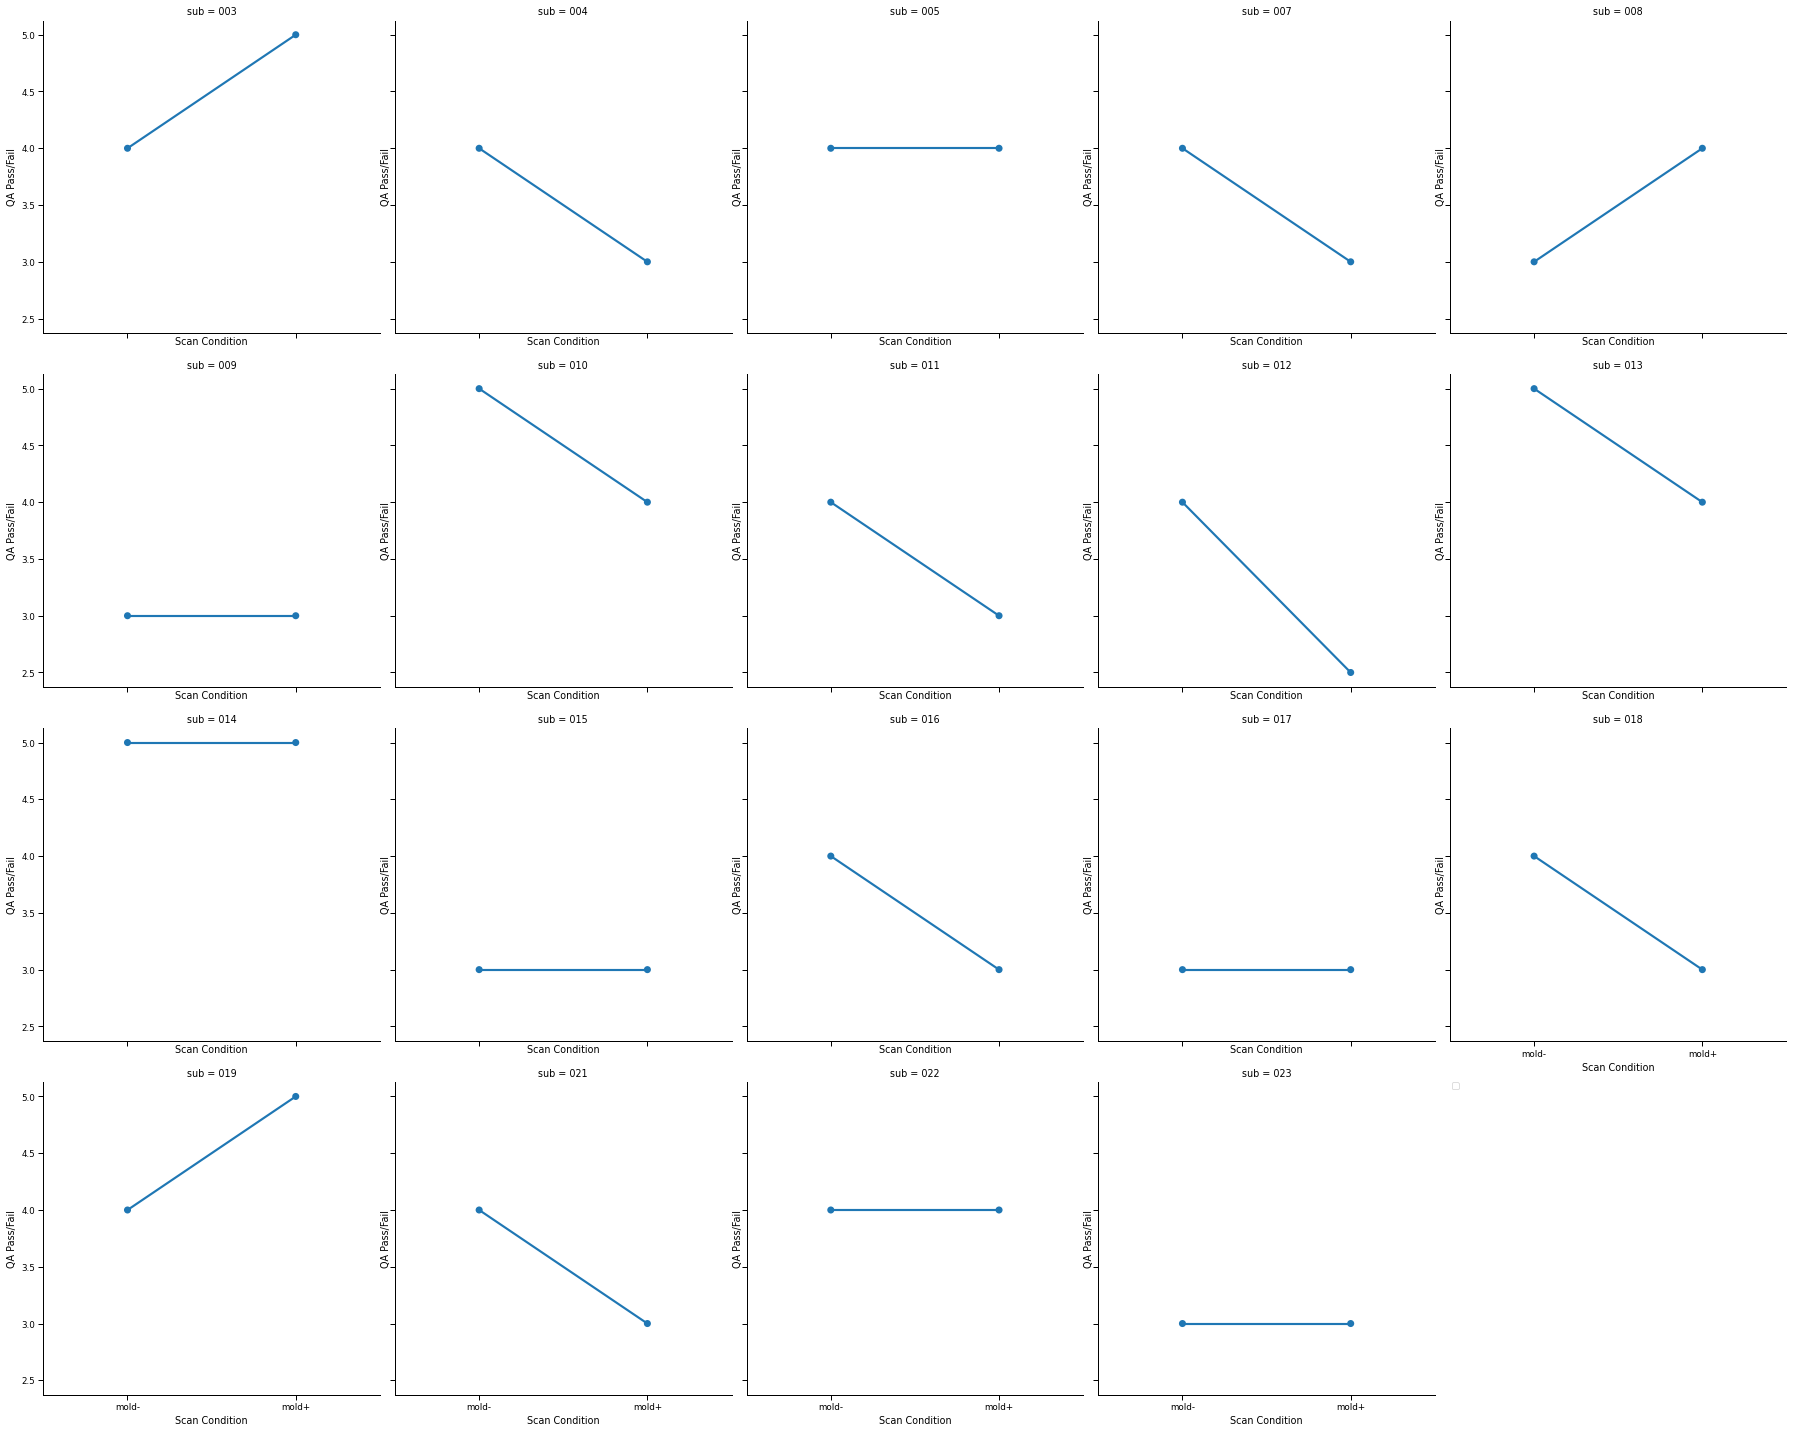

In [11]:

ax = sns.catplot(x="variable", y="value", data=df[['sub', 'mold-', 'mold+']].melt(id_vars = 'sub'), order = ['mold-', 'mold+'], kind = 'point', col = 'sub', col_wrap = 5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Scan Condition', ylabel='QA Pass/Fail')
sns.despine()
sns.set_context("paper")

In [63]:
df

,sub,mold-,mold+,compare,What was the best part of the scan?,What was the worst part of the scan?,return
0,003,4.0,5.0,1,Movie,Ear plugs were pushing in too far without the ...,1
1,004,4.0,3.0,0,Movie,Noise,2
2,005,4.0,4.0,1,"Movie, bed moving up and down",MRI was loud during quiet parts of movie,1
4,007,4.0,3.0,1,Movie,Nothing,1
5,008,3.0,4.0,0,Movie,Nothing,1
6,009,3.0,3.0,0,Getting out of it,The noise,0
7,010,5.0,4.0,0,Movie,Nothing,1
8,011,4.0,3.0,0,Movie,Nothing,1
9,012,4.0,2.5,0,"Movie, laying down",Uncomfortable with the mask,2
10,013,5.0,4.0,2,Movie,Nothing,1


In [18]:
from scipy.stats import wilcoxon

w, p = wilcoxon(df['mold-'], df['mold+'])
w, p 


(18.0, 0.07070114486598297)

In [71]:
df[['mold-', 'mold+']]

df.pivot(index='survey_id', columns='question_number', values='answer')
         .add_prefix('P')
         .reset_index()
        

,mold-,mold+
0,4.0,5.0
1,4.0,3.0
2,4.0,4.0
4,4.0,3.0
5,3.0,4.0
6,3.0,3.0
7,5.0,4.0
8,4.0,3.0
9,4.0,2.5
10,5.0,4.0


In [93]:
df.groupby('mold-').size()

mold-
3.0     5
4.0    11
5.0     3
dtype: int64

In [99]:
sdf = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
sdf.index = ['mold-', 'mold+'] 

,a,b,c,d
0,0.014865,0.026362,0.139202,0.862477
1,0.489022,0.055580,0.387790,0.709602
2,0.146279,0.036914,0.265835,0.650670
3,0.231860,0.090965,0.109251,0.031333
4,0.617522,0.912578,0.406448,0.566387
5,0.585237,0.631454,0.088097,0.102462
6,0.242595,0.570952,0.721061,0.444231
7,0.582932,0.305318,0.050527,0.721809
8,0.671420,0.765864,0.733977,0.552625
9,0.447544,0.686053,0.799669,0.697937


In [113]:
100*(sdf/19)

,2.5,3,4,5
mold-,0.000000,26.315789,57.894737,15.789474
mold+,5.263158,52.631579,26.315789,15.789474


In [175]:
{k: (results[k] / 19) for k in results}

TypeError: unsupported operand type(s) for /: 'list' and 'int'

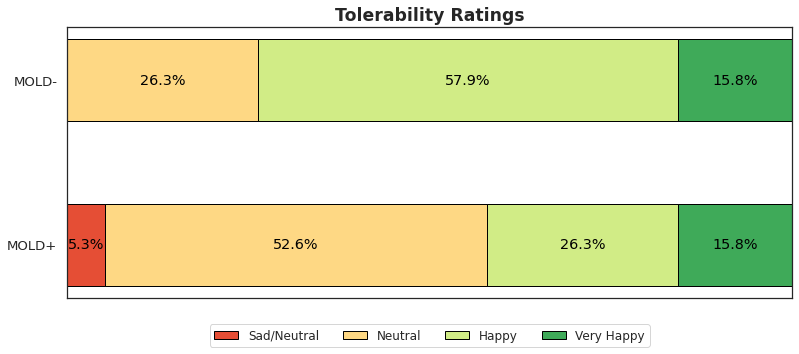

In [193]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Sad/Neutral', 'Neutral',
                  'Happy', 'Very Happy']
results = {
    'MOLD-': [0, 26.3, 57.9, 15.8],
    'MOLD+': [5.3, 52.6, 26.3, 15.8],
}

# results = {
#     'MOLD-': [0, 5, 11, 3],
#     'MOLD+': [1, 10, 5, 3],
# }

sdf = pd.DataFrame(data = {'2.5': [0, 1], '3': [5, 10], '4': [11, 5], '5': [3, 3]})

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
        
    sns.set(style="white", font_scale=1.2)
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(13, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color, edgecolor='black')
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c != 0:
                ax.text(x, y, str(c) + '%', ha='center', va='center',
                        color=text_color, fontsize='medium')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, -.2),
              loc='lower center', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.title('Tolerability Ratings', fontsize='large', fontweight='bold')
plt.savefig('figs/tolerance_barh.png', dpi = 300)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

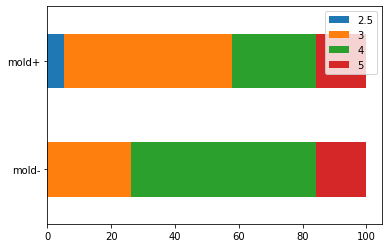

In [116]:
sdf = pd.DataFrame(data = {'2.5': [0, 1], '3': [5, 10], '4': [11, 5], '5': [3, 3]})
sdf.index = ['mold-', 'mold+'] 
(100*(sdf/19)).plot.barh(stacked=True)
plt.

TypeError: bar() got multiple values for keyword argument 'bottom'

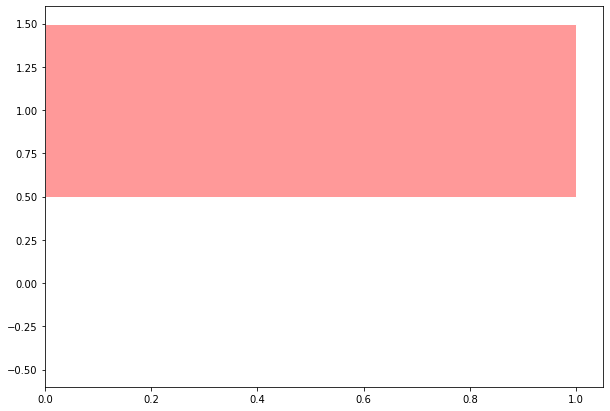

In [159]:
#Get values from the group and categories
cond = ["mold-", "mold+"]
a = [0, 1]
b = [5, 10]
c = [11, 5]
d = [3, 3]  
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(cond))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
ax1 = plt.barh(r, a, color=colors[0], edgecolor='white', height=barWidth, label="2.5")
ax2 = plt.barh(r, b, bottom=np.array(a), color=colors[1], edgecolor='white', height=barWidth, label='3')
ax3 = plt.barh(r, c, bottom=np.array(a)+np.array(b), color=colors[2], edgecolor='white', height=barWidth, label='4')
ax4 = plt.barh(r, d, bottom=np.array(a)+np.array(b)+np.array(c), color=colors[3], edgecolor='white', height=barWidth, label='5')
plt.legend()
# Custom X axis
plt.xticks(r, cond, fontweight='bold')
plt.ylabel("sales")
for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=16, fontweight="bold")


plt.show()
# You can replace "%d" % h1 with "{}".format(h1)

In [10]:
%load_ext rpy2.ipython

In [42]:
%%R -i df
str(df)

'data.frame':	19 obs. of  7 variables:
 $ sub                                 : chr  "003" "004" "005" "007" ...
 $ mold-                               : num  4 4 4 4 3 3 5 4 4 5 ...
 $ mold+                               : num  5 3 4 3 4 3 4 3 2.5 4 ...
 $ compare                             : int  1 0 1 1 0 0 0 0 0 2 ...
 $ What was the best part of the scan? : chr  "Movie" "Movie" "Movie, bed moving up and down" "Movie" ...
 $ What was the worst part of the scan?: chr  "Ear plugs were pushing in too far without the helmet" "Noise" "MRI was loud during quiet parts of movie" "Nothing" ...
 $ return                              : int  1 2 1 1 1 0 1 1 2 1 ...


In [43]:
%%R
df$'mold+' <- as.factor(df$'mold+')
df$'mold-' <- as.factor(df$'mold-')
levels(df$'mold-')

[1] "3" "4" "5"


In [51]:
%%R
levels(df$'mold+')

[1] "2.5" "3"   "4"   "5"  


In [135]:
df['mold+'].astype(int)

0     5
1     3
2     4
4     3
5     4
6     3
7     4
8     3
9     2
10    4
11    5
12    3
13    3
14    3
15    3
16    5
17    3
18    4
19    3
Name: mold+, dtype: int64

In [151]:
%%R -i df
library(likert) 
library(dplyr)
library(ggpubr)

# df$'mold+' <- as.character(df$'mold+')
# df$'mold-' <- as.character(df$'mold-')



df$'mold+' <- factor(df$'mold+')
df$'mold-' <- factor(df$'mold-', levels = c('2.5', '3' ,'4', '5'))
# levels(df$'mold-') <- c('2.5', levels(df$'mold-'))
df
print(df)
print(levels(df$'mold+'))
print(levels(df$'mold-'))

   sub mold- mold+ compare What was the best part of the scan?
0  003     4     5       1                               Movie
1  004     4     3       0                               Movie
2  005     4     4       1       Movie, bed moving up and down
4  007     4     3       1                               Movie
5  008     3     4       0                               Movie
6  009     3     3       0                   Getting out of it
7  010     5     4       0                               Movie
8  011     4     3       0                               Movie
9  012     4   2.5       0                  Movie, laying down
10 013     5     4       2                               Movie
11 014     5     5       1                               Movie
12 015     3     3       0     "when I didn't have the helmet"
13 016     4     3       0               "I really don't know"
14 017     3     3       0                               Movie
15 018     4     3       1       Playing with a pad on 

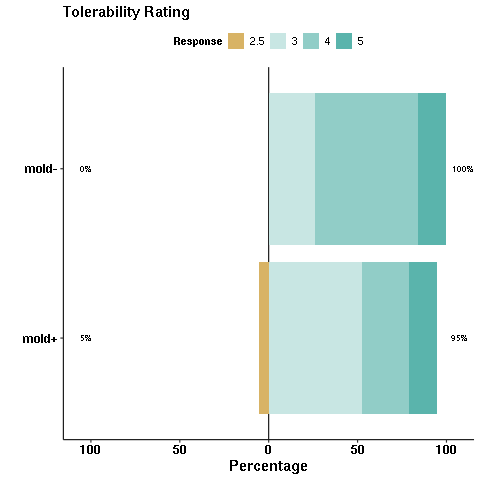

In [157]:
%%R -i df
library(likert) 
library(dplyr)
library(ggpubr)

# df$'mold+' <- as.character(df$'mold+')
# df$'mold-' <- as.character(df$'mold-')



df$'mold+' <- factor(df$'mold+')
df$'mold-' <- factor(df$'mold-', levels = c('2.5', '3' ,'4', '5'))

p <- likert(df %>% select('mold-', 'mold+'))

plot(p, center = 1.5) + ggtitle("Tolerability Rating") +
  theme(plot.title = element_text()) + theme_pubr() + labs_pubr()
    
# ggplot <- plot(p) + ggtitle("Tolerability Rating") +
#   theme(plot.title = element_text()) + theme_pubr() + labs_pubr()

# ggsave(filename="tolerability_rating.png", plot=ggplot, device="png",
#    path='/scratch/06028/tbweng/child-motion/', height=5, width=5, units="in", dpi=500)

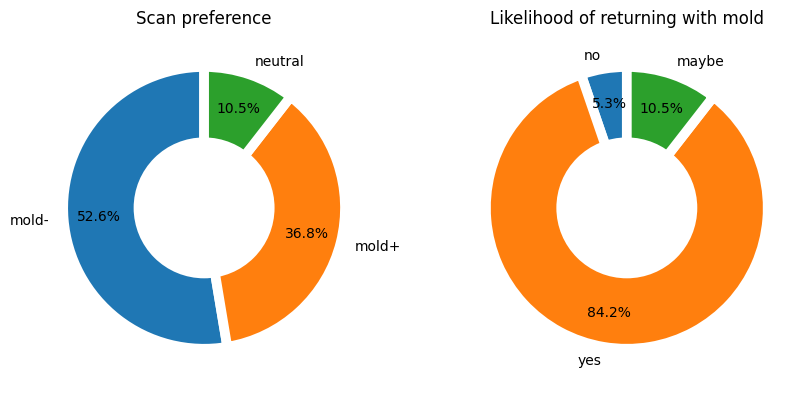

In [195]:
plt.rcdefaults()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

labels = [ 'mold-', 'mold+', 'neutral' ]
sizes = df.groupby('compare').count()['sub'].to_list()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75,
       wedgeprops={"edgecolor":"white",'linewidth': 7, 'antialiased': True})

ax1.title.set_text('Scan preference')

centre_circle = plt.Circle((0,0),0.50,fc='white')
ax1.add_artist(centre_circle)

labels = [ 'no', 'yes', 'maybe' ]
sizes = df.groupby('return').count()['sub'].to_list()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75,
       wedgeprops={"edgecolor":"white",'linewidth': 7, 'antialiased': True, })

ax2.title.set_text('Likelihood of returning with mold')

centre_circle = plt.Circle((0,0),0.50,fc='white')
ax2.add_artist(centre_circle)


plt.show()